Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [5]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f: 
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Fixing Data Types

In [6]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [7]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [8]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for account in daily_engagement:
    account['account_key'] = account['acct'] # create new key equal to existing value
    del[account['acct']] # this deletes the acct key from the dictionary
daily_engagement[0]['account_key']


u'0'

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [10]:
def get_unique_students(data):
    ## function to find number of unique students using the 
    ## account_key 
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [11]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)

len(enrollments)             # number of enrollments

1640

In [12]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students) # unique enrolled students

1302

In [13]:
len(daily_engagement)             # number of engagements

136240

In [14]:
unique_engaged_students = get_unique_students(daily_engagement)
len(unique_engaged_students) # unique engaged students

1237

In [15]:
len(project_submissions) # total number of project submissions

3642

In [16]:
unique_submission_students = get_unique_students(project_submissions)
len(unique_submission_students)  # unique students who submitted a project

743

## Problems in the Data

## Missing Engagement Records

In [20]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments: # loop over enrollment table
    student = enrollment['account_key'] # find account key for each enrollment
    if student not in unique_engaged_students: # check if in the list of unique engagments we made
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [22]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

## no longer consider immediate cancelation suprising

for enrollment in enrollments: # loop over enrollment table
    student = enrollment['account_key'] # find account key for each enrollment
    days = enrollment['days_to_cancel']
    if student not in unique_engaged_students \
        and days != 0: # check if in the list of unique engagments we made
        print enrollment # suprising points- what is up? 


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


not sure what the problem is: after asking someone, turns out they were udacity test accounts, indicated by 'is_udacity' = True. We will want to exclude these

## Tracking Down the Remaining Problems

In [24]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts) # number of test accounts

6

In [25]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [26]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [27]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for student in non_udacity_enrollments: 
    cancelation = student['days_to_cancel']
    if cancelation is None or cancelation > 7:
        account_key = student['account_key']
        enrollment_date = student['join_date']
        if (account_key not in paid_students or 
            enrollment_date > paid_students[account_key]): 
            # want to save most recent enrollment date
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Getting Data from First Week

In [28]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [29]:
# Removes students who cancelled within the first week
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [30]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

print(paid_engagement[0])
print(paid_students.items()[1])

1293
134549
3618
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
(u'1175', datetime.datetime(2015, 4, 2, 0, 0))


In [31]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

# get days visited
for engagement_record in paid_engagement: 
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else: 
        engagement_record['has_visited'] = 0
        
paid_engagement_in_first_week = [] # empty list. not using a dictionary because
# each student has multiple engagements

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key'] # need to look up join dates in the enrollment dictionary
    engagement_date = engagement_record['utc_date']
    join_date = paid_students[account_key] # using account_key from the engagement_record

    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement_record)


        
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [32]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
# if key is not there, get the empty list instead
engagement_by_account = defaultdict(list) # default dict allows you to specify a default value
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record) # add engagement to the list associated with the account key

print(engagement_by_account.items()[0])

(u'1200', [{u'lessons_completed': 1, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 114.853432, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 43.4168625, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 187.776832833, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 150.081577333, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 191.61088, u'projects_completed': 0, 'account_

In [33]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {} # using a dictionary
for account_key, engagement_for_student in engagement_by_account.items(): # get the two items from the dictionary
    total_minutes = 0
    # loop over each engagement record under that account key
    for engagement_record in engagement_for_student: # engagment for student is a list
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

total_minutes_by_account.items()[0:10]

[(u'619', 1482.9020456663002),
 (u'1140', 129.85920366667),
 (u'669', 0.0),
 (u'428', 726.26075933267),
 (u'344', 614.9778563333),
 (u'0', 494.88049616599994),
 (u'346', 248.12435916639998),
 (u'347', 713.3479524992999),
 (u'340', 392.473794834),
 (u'341', 35.531418)]

In [34]:
# want to get the average values, going to use numpy
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


numpy's version of min and max is preferable to the built in version. 

why is the maximum so huge? it is actually more than the total number of minutes in the week. Found a bug in the within_one_week function and fixed it, correct now. 

## Debugging Data Analysis Code

In [35]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

# find the user with the maximum time: 
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes # have the max minutes. now look at the student's engagment records:

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record # way more than 7 records, not falling within one week time span.

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

## Lessons Completed in First Week

In [36]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

from collections import defaultdict

def group_data(data, key_name): 
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

engagement_by_account.items()[0]

(u'1200',
 [{'account_key': u'1200',
   'has_visited': 1,
   u'lessons_completed': 1,
   u'num_courses_visited': 2,
   u'projects_completed': 0,
   u'total_minutes_visited': 114.853432,
   u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)},
  {'account_key': u'1200',
   'has_visited': 1,
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': 0,
   u'total_minutes_visited': 43.4168625,
   u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)},
  {'account_key': u'1200',
   'has_visited': 1,
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': 0,
   u'total_minutes_visited': 187.776832833,
   u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)},
  {'account_key': u'1200',
   'has_visited': 1,
   u'lessons_completed': 0,
   u'num_courses_visited': 1,
   u'projects_completed': 0,
   u'total_minutes_visited': 150.081577333,
   u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)},
  {'account_key': u'1200',
   'has_visited': 1,
   u'lessons_com

In [37]:
# sum the grouped data

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

In [38]:
# describe data

import numpy as np

def describe_data(data): 
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum', np.min(data)
    print 'Maximum', np.max(data)
    
describe_data(total_minutes_by_account.values())

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum 0.0
Maximum 3564.7332645


In [39]:
describe_data(total_lessons_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum 0
Maximum 36


## Number of Visits in First Week

In [40]:
##### #                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

# create field 'has_visited'

      
total_visits_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

describe_data(total_visits_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum 0
Maximum 7


## Splitting out Passing Students

In [41]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set() # find students that passed

for submission in project_submissions: 
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if ((project in subway_project_lesson_keys) and 
        (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])
        
print len(pass_subway_project)

# split the data into two lists
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week: 
    if engagement_record['account_key'] in pass_subway_project: 
        passing_engagement.append(engagement_record)
    else: 
        non_passing_engagement.append(engagement_record)
        
print len(passing_engagement)
print len(non_passing_engagement)

653
4527
2392


## Comparing the Two Student Groups

In [42]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# group data 

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

In [43]:
# total minutes comparison

total_minutes_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
total_minutes_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')

print 'passing students:'
describe_data(total_minutes_by_passing_account.values())
print 'non passing students:'
describe_data(total_minutes_by_non_passing_account.values())

passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum 0.0
Maximum 3564.7332645
non passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum 0.0
Maximum 1768.52274933


spend less time 

In [44]:
# total lessons comparision
total_lessons_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
total_lessons_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')

print 'passing students:'
describe_data(total_lessons_by_passing_account.values())
print 'non passing students:'
describe_data(total_lessons_by_non_passing_account.values())


passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum 0
Maximum 36
non passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum 0
Maximum 27


don't complete as many lessons

In [45]:
# days visited comparison
total_visits_by_passing_account = sum_grouped_items(passing_engagement_by_account, 'has_visited')
total_visits_by_non_passing_account = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')

print 'passing students:'
describe_data(total_visits_by_passing_account.values())
print 'non passing students:'
describe_data(total_visits_by_non_passing_account.values())

passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum 0
Maximum 7
non passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum 0
Maximum 7


visit less often

## Making Histograms

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

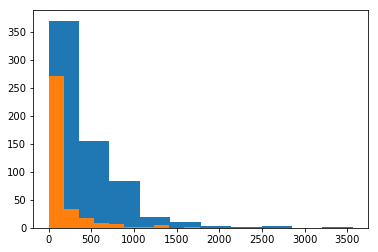

In [46]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt

# total minutes passing students
plt.hist(total_minutes_by_passing_account.values())

# total minutes nonpassing students
plt.hist(total_minutes_by_non_passing_account.values())

# plots get superimposed, good for comparing the distribution. 

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

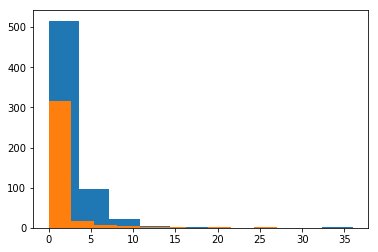

In [47]:
# total lessons passing students
plt.hist(total_lessons_by_passing_account.values())

# total lessons nonpassing students
plt.hist(total_lessons_by_non_passing_account.values())

(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

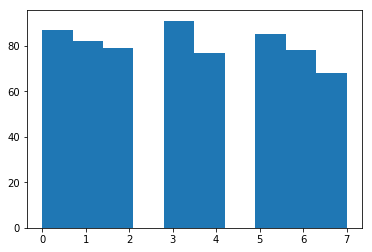

In [48]:
# total visits passing students
plt.hist(total_visits_by_passing_account.values())

# separated this one because the first plot was obscured

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

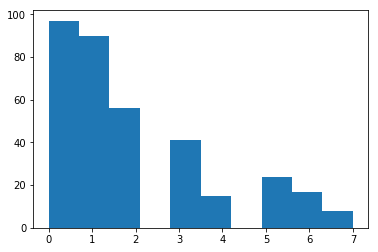

In [49]:
# total visits nonpassing students
plt.hist(total_visits_by_non_passing_account.values())

## Improving Plots and Sharing Findings

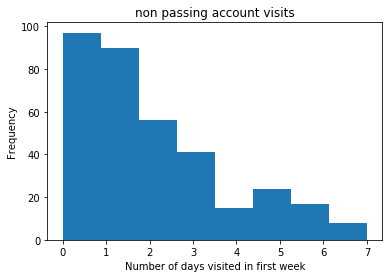

In [53]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(total_visits_by_non_passing_account.values(), bins = 8)
plt.xlabel('Number of days visited in first week')
plt.ylabel('Frequency')
plt.title('non passing account visits')

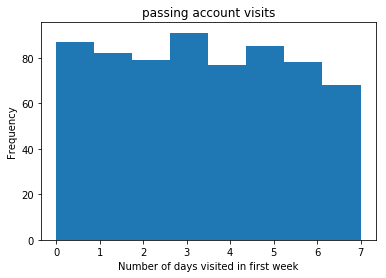

In [54]:
plt.hist(total_visits_by_passing_account.values(), bins = 8)
plt.xlabel('Number of days visited in first week')
plt.ylabel('Frequency')
plt.title('passing account visits')